# Dynamic ecoregions

## Define inputs

In [1]:
# Inputs
input_file = "data/data-new-york-city.txt"
geohash_precision = 6
log_file = "run.log"
output_file = "output.geojson"
num_clusters = 8

## Set up logging

In [2]:
import logging

logging.basicConfig(filename=log_file, encoding="utf-8", level=logging.INFO)

## Data flow

In [3]:
from src.mermaid import build_mermaid_graph

build_mermaid_graph()

## `DarwinCoreCsvLazyFrame`

### Build

In [4]:
from src.lazyframes.darwin_core_csv import DarwinCoreCsvLazyFrame

darwin_core_csv_lazy_frame = DarwinCoreCsvLazyFrame.build(input_file)

### Preview

In [5]:
darwin_core_csv_lazy_frame.lf.limit(3).collect()

gbifID,accessRights,bibliographicCitation,language,license,modified,publisher,references,rightsHolder,type,institutionID,collectionID,datasetID,institutionCode,collectionCode,datasetName,ownerInstitutionCode,basisOfRecord,informationWithheld,dataGeneralizations,dynamicProperties,occurrenceID,catalogNumber,recordNumber,recordedBy,recordedByID,individualCount,organismQuantity,organismQuantityType,sex,lifeStage,reproductiveCondition,caste,behavior,vitality,establishmentMeans,degreeOfEstablishment,…,distanceFromCentroidInMeters,issue,mediaType,hasCoordinate,hasGeospatialIssues,taxonKey,acceptedTaxonKey,kingdomKey,phylumKey,classKey,orderKey,familyKey,genusKey,subgenusKey,speciesKey,species,acceptedScientificName,verbatimScientificName,typifiedName,protocol,lastParsed,lastCrawled,repatriated,relativeOrganismQuantity,projectId,isSequenced,gbifRegion,publishedByGbifRegion,level0Gid,level0Name,level1Gid,level1Name,level2Gid,level2Name,level3Gid,level3Name,iucnRedListCategory
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,…,str,str,str,str,str,u64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""3873630669""",null,null,null,"""CC_BY_NC_4_0""","""2022-07-17T19:18:35Z""","""iNaturalist.org""","""https://www.inaturalist.org/ob…","""Susan J. Hewitt""",null,null,null,null,"""iNaturalist""","""Observations""","""iNaturalist research-grade obs…",null,"""HUMAN_OBSERVATION""",null,null,null,"""https://www.inaturalist.org/ob…","""126532255""",null,"""Susan J. Hewitt""",null,null,null,null,null,null,null,null,null,null,null,null,…,null,"""COORDINATE_ROUNDED;CONTINENT_D…","""StillImage""","""true""","""false""",3120946,"""3120946""","""6""","""7707728""","""220""","""414""","""3065""","""3120641""",null,"""3120946""","""Artemisia vulgaris""","""Artemisia vulgaris L.""","""Artemisia vulgaris""",null,"""DWC_ARCHIVE""","""2024-11-25T07:11:55.041Z""","""2024-11-24T12:50:10.745Z""","""false""",null,"""null""","""false""","""NORTH_AMERICA""","""NORTH_AMERICA""","""USA""","""United States""","""USA.33_1""","""New York""","""USA.33.32_1""","""New York""",null,null,"""NE"""
"""1500300889""",null,null,null,"""CC_BY_NC_4_0""","""2020-07-01T14:20:17Z""","""iNaturalist.org""","""https://www.inaturalist.org/ob…","""Tan Kok Hui""",null,null,null,null,"""iNaturalist""","""Observations""","""iNaturalist research-grade obs…",null,"""HUMAN_OBSERVATION""",null,null,null,"""https://www.inaturalist.org/ob…","""5916697""",null,"""Tan Kok Hui""",null,null,null,null,null,"""Juvenile""",null,null,null,null,null,null,…,null,"""CONTINENT_DERIVED_FROM_COORDIN…","""StillImage""","""true""","""false""",2481134,"""2481134""","""1""","""44""","""212""","""7192402""","""9316""","""2481126""",null,"""2481134""","""Larus delawarensis""","""Larus delawarensis Ord, 1815""","""Larus delawarensis""",null,"""DWC_ARCHIVE""","""2024-11-25T06:59:47.147Z""","""2024-11-24T12:50:10.745Z""","""false""",null,"""null""","""false""","""NORTH_AMERICA""","""NORTH_AMERICA""","""USA""","""United States""","""USA.33_1""","""New York""","""USA.33.32_1""","""New York""",null,null,"""LC"""
"""1640074334""",null,null,null,"""CC_BY_NC_4_0""","""2017-09-01T22:58:42Z""","""iNaturalist.org""","""https://www.inaturalist.org/ob…","""Priyantha Wijesinghe""",null,null,null,null,"""iNaturalist""","""Observations""","""iNaturalist research-grade obs…",null,"""HUMAN_OBSERVATION""",null,null,null,"""https://www.inaturalist.org/ob…","""7721017""",null,"""Priyantha Wijesinghe""",null,null,null,null,null,"""Adult""",null,null,null,null,null,null,…,null,"""COORDINATE_ROUNDED;CONTINENT_D…","""StillImage;StillImage""","""true""","""false""",1991429,"""1991429""","""1""","""54""","""216""","""797""","""6950""","""1991426""",null,"""1991429""","""Haematopis grataria""","""Haematopis grataria (Fabricius…","""Haematopis grataria""",null,"""DWC_ARCHIVE"

## `TaxonomyDataFrame`

### Build

In [6]:
from src.dataframes.taxonomy import TaxonomyDataFrame

taxonomy_dataframe = TaxonomyDataFrame.build(darwin_core_csv_lazy_frame)

### Preview

In [7]:
taxonomy_dataframe.df.limit(3)

kingdom,phylum,class,order,family,genus,species
enum,str,str,str,str,str,str
"""Fungi""","""Ascomycota""","""Leotiomycetes""","""Helotiales""","""Erysiphaceae""","""Neoerysiphe""","""Neoerysiphe chelones"""
"""Fungi""","""Basidiomycota""","""Agaricomycetes""","""Phallales""","""Phallaceae""","""Phallus""","""Phallus rubicundus"""
"""Plantae""","""Tracheophyta""","""Liliopsida""","""Poales""","""Poaceae""","""Leymus""","""Leymus arenarius"""


## `GeohashSpeciesCountsDataFrame`

### Build

In [8]:
from src.dataframes.geohash_species_counts import GeohashSpeciesCountsDataFrame

geohash_taxa_counts_dataframe = GeohashSpeciesCountsDataFrame.build(
    darwin_core_csv_lazy_frame, geohash_precision
)

### Preview

In [9]:
geohash_taxa_counts_dataframe.df.limit(3)

geohash,kingdom,rank,name,count
str,enum,enum,str,u32
"""dr5nqk""","""Animalia""","""species""","""Falco sparverius""",1
"""dr5nqk""","""Animalia""","""species""","""Morone saxatilis""",3
"""dr5nqk""","""Animalia""","""species""","""Setophaga cerulea""",1


## `DistanceMatrix`

### Build

In [10]:
from src.matrices.distance import DistanceMatrix

distance_matrix = DistanceMatrix.build(geohash_taxa_counts_dataframe)

/Users/coreyf/dev/frewsxcv/citizen-science-ecoregions-experiments/.venv/lib/python3.13/site-packages/sklearn/decomposition/_incremental_pca.py:376: RuntimeWarning: Mean of empty slice.
  self.noise_variance_ = explained_variance[self.n_components_ :].mean()
/Users/coreyf/dev/frewsxcv/citizen-science-ecoregions-experiments/.venv/lib/python3.13/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


### Preview

In [11]:
distance_matrix.squareform()

array([[0.        , 0.68982915, 1.04335532, ..., 1.04639488, 0.99942208,
        1.06138662],
       [0.68982915, 0.        , 1.03647173, ..., 1.04525341, 1.00780828,
        1.05172318],
       [1.04335532, 1.03647173, 0.        , ..., 0.73459674, 0.93325585,
        0.64238215],
       ...,
       [1.04639488, 1.04525341, 0.73459674, ..., 0.        , 0.86154032,
        0.67859757],
       [0.99942208, 1.00780828, 0.93325585, ..., 0.86154032, 0.        ,
        0.92554421],
       [1.06138662, 1.05172318, 0.64238215, ..., 0.67859757, 0.92554421,
        0.        ]], shape=(1663, 1663))

## `GeohashClusterDataFrame`

### Build

In [12]:
from src.dataframes.geohash_cluster import GeohashClusterDataFrame

geohash_cluster_dataframe = GeohashClusterDataFrame.build(
    geohash_taxa_counts_dataframe,
    distance_matrix,
    num_clusters,
)

### Preview

In [13]:
geohash_cluster_dataframe.df.limit(3)

geohash,cluster
str,u32
"""dr5nqk""",5
"""dr5nqm""",5
"""dr5nqq""",6


## `ClusterColorDataFrame`

### Build

In [14]:
from src.dataframes.cluster_color import ClusterColorDataFrame

cluster_colors_dataframe = ClusterColorDataFrame.build(geohash_cluster_dataframe)

### Preview

In [15]:
cluster_colors_dataframe.df.limit(3)

cluster,color
u32,str
1,"""#d8424d"""
2,"""#f57948"""
3,"""#fdbe6e"""


## `ClusterTaxaStatisticsDataFrame`

### Build

In [16]:
from src.dataframes.cluster_taxa_statistics import ClusterTaxaStatisticsDataFrame

cluster_taxa_statistics_dataframe = ClusterTaxaStatisticsDataFrame.build(
    geohash_taxa_counts_dataframe,
    geohash_cluster_dataframe,
    taxonomy_dataframe,
)

### Preview

In [17]:
cluster_taxa_statistics_dataframe.df.limit(3)

cluster,kingdom,rank,name,count,average
u32,enum,enum,str,u32,f64
null,"""Animalia""","""phylum""","""Bryozoa""",10,0.000019
null,"""Animalia""","""phylum""","""Rotifera""",9,0.000017
null,"""Viruses""","""phylum""","""Artverviricota""",53,0.000102


## `ClusterSignificantDifferencesDataFrame`

### Build

In [18]:
from src.dataframes.cluster_significant_differences import ClusterSignificantDifferencesDataFrame

cluster_significant_differences_dataframe = ClusterSignificantDifferencesDataFrame.build(
    cluster_taxa_statistics_dataframe,
)

/Users/coreyf/dev/frewsxcv/citizen-science-ecoregions-experiments/src/dataframes/cluster_significant_differences.py:32: UserWarning: Comparisons with None always result in null. Consider using `.is_null()` or `.is_not_null()`.
  pl.col("cluster") == cluster,


### Preview

In [19]:
cluster_significant_differences_dataframe.df.limit(3)

cluster,taxon,percentage_difference
u32,str,f64
1,"""Columba livia""",247.803407
1,"""Ailanthus altissima""",459.632275
1,"""Lycorma delicatula""",168.646202


## Build and plot GeoJSON feature collection

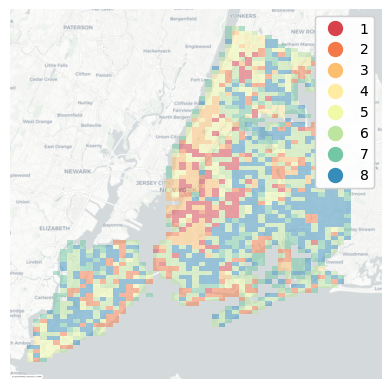

In [20]:
from src.geojson import build_geojson_feature_collection, write_geojson
from src.render import plot_clusters

feature_collection = build_geojson_feature_collection(
    geohash_cluster_dataframe,
    cluster_colors_dataframe,
)

# print_results(darwin_core_aggregations, all_stats, cluster_dataframe)

write_geojson(feature_collection, output_file)

plot_clusters(feature_collection)

write_geojson(feature_collection, output_file)

# Build and display HTML output

In [21]:
from src.html_output import build_html_output
from IPython.display import display, HTML

html = build_html_output(
    cluster_colors_dataframe,
    cluster_significant_differences_dataframe,
)

display(HTML(html))


# TMP START

In [22]:
ordered_geohashes = geohash_taxa_counts_dataframe.ordered_geohashes()

ordered_geohashes

import geohashr
import numpy as np

# Step 1: Create a dictionary mapping each geohash to its neighbors
geo_list = ordered_geohashes
geohash_neighbors = {gh: set(geohashr.neighbors(gh).values()) for gh in geo_list}

# Step 2: Construct a connectivity matrix
num_geohashes = len(geo_list)
connectivity_matrix = np.zeros((num_geohashes, num_geohashes), dtype=int)

for i, geoh1 in enumerate(geo_list):
    for j, geoh2 in enumerate(geo_list):
        if i != j and geoh2 in geohash_neighbors[geoh1]:  # Check if geoh2 is a neighbor of geoh1
            connectivity_matrix[i, j] = 1

# Step 3: Print the resulting connectivity matrix
print("Connectivity Matrix:")
print(connectivity_matrix)

Connectivity Matrix:
[[0 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 1 1 0]]


In [23]:
connectivity_matrix.shape

(1663, 1663)

In [24]:
distance_matrix.squareform().shape

(1663, 1663)

In [25]:
for i, row in enumerate(connectivity_matrix):
    print(i, row)
    assert sum(row) >= 1, f"row {ordered_geohashes[i]} sum is {sum(row)}"


0 [0 1 0 ... 0 0 0]
1 [1 0 1 ... 0 0 0]
2 [0 1 0 ... 0 0 0]
3 [0 0 1 ... 0 0 0]
4 [1 1 0 ... 0 0 0]
5 [1 1 1 ... 0 0 0]
6 [0 0 0 ... 0 0 0]
7 [0 0 0 ... 0 0 0]
8 [0 1 1 ... 0 0 0]
9 [0 0 1 ... 0 0 0]
10 [0 0 0 ... 0 0 0]
11 [0 0 0 ... 0 0 0]
12 [0 0 0 ... 0 0 0]
13 [0 0 0 ... 0 0 0]
14 [0 0 0 ... 0 0 0]
15 [0 0 0 ... 0 0 0]
16 [0 0 0 ... 0 0 0]
17 [0 0 0 ... 0 0 0]
18 [0 0 0 ... 0 0 0]
19 [0 0 0 ... 0 0 0]
20 [0 0 0 ... 0 0 0]
21 [0 0 0 ... 0 0 0]
22 [0 0 0 ... 0 0 0]
23 [0 0 0 ... 0 0 0]
24 [0 0 0 ... 0 0 0]
25 [0 0 0 ... 0 0 0]
26 [0 0 0 ... 0 0 0]
27 [0 0 0 ... 0 0 0]
28 [0 0 0 ... 0 0 0]
29 [0 0 0 ... 0 0 0]
30 [0 0 0 ... 0 0 0]
31 [0 0 0 ... 0 0 0]
32 [0 0 0 ... 0 0 0]
33 [0 0 0 ... 0 0 0]
34 [0 0 0 ... 0 0 0]
35 [0 0 0 ... 0 0 0]
36 [0 0 0 ... 0 0 0]
37 [0 0 0 ... 0 0 0]
38 [0 0 0 ... 0 0 0]
39 [0 0 0 ... 0 0 0]
40 [0 0 0 ... 0 0 0]
41 [0 0 0 ... 0 0 0]
42 [0 0 0 ... 0 0 0]
43 [0 0 0 ... 0 0 0]
44 [0 0 0 ... 0 0 0]
45 [0 0 0 ... 0 0 0]
46 [0 0 0 ... 0 0 0]
47 [0 0 0 ... 0 0 0]
48

In [34]:
from sklearn.cluster import AgglomerativeClustering
from scipy.sparse import csr_matrix

model = AgglomerativeClustering(
    n_clusters=16,
    connectivity=csr_matrix(connectivity_matrix),
    linkage="ward",
)

labels = model.fit_predict(distance_matrix.squareform())

labels

array([ 3,  3,  3, ...,  2, 12,  2], shape=(1663,))

In [35]:
geohash_cluster_dataframe = GeohashClusterDataFrame.from_lists(ordered_geohashes, labels)

In [36]:
from src.dataframes.cluster_color import ClusterColorDataFrame

cluster_colors_dataframe = ClusterColorDataFrame.build(geohash_cluster_dataframe)

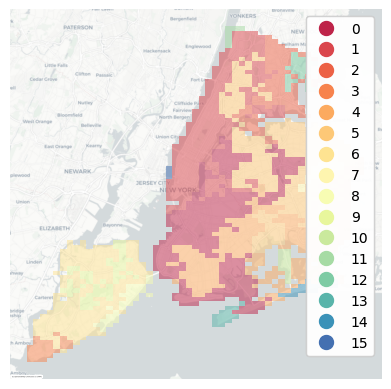

In [37]:
from src.geojson import build_geojson_feature_collection, write_geojson
from src.render import plot_clusters

feature_collection = build_geojson_feature_collection(
    geohash_cluster_dataframe,
    cluster_colors_dataframe,
)

# print_results(darwin_core_aggregations, all_stats, cluster_dataframe)

write_geojson(feature_collection, output_file)

plot_clusters(feature_collection)

write_geojson(feature_collection, output_file)

# TMP END

In [38]:
from sklearn.manifold import TSNE

tsne = TSNE(
    n_components=2,
    random_state=42,
    metric="precomputed",
    init="random",
    perplexity=min(30, distance_matrix.squareform().shape[0] - 1), # HACK FOR SMALLER DATASETS
)
X_tsne = tsne.fit_transform(distance_matrix.squareform())
tsne.kl_divergence_


1.946699619293213

<Axes: >

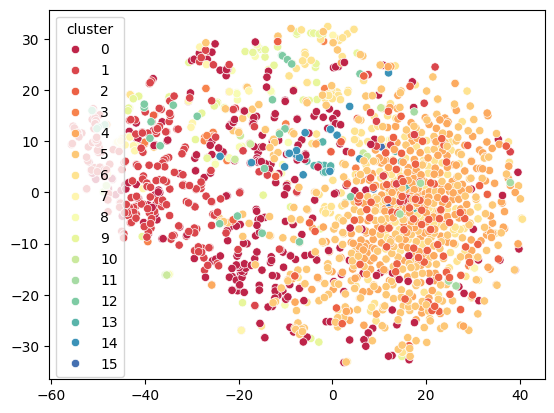

In [39]:
import seaborn as sns

sns.scatterplot(
    x=X_tsne[:, 0],
    y=X_tsne[:, 1],
    hue=geohash_cluster_dataframe.df["cluster"],
    palette=cluster_colors_dataframe.to_dict(),
    alpha=1,
)

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import polars as pl
from scipy.cluster.hierarchy import linkage

from src.darwin_core import TaxonRank

linkage_array = linkage(distance_matrix.condensed(), "ward")

ordered_geohashes = geohash_taxa_counts_dataframe.ordered_geohashes()

def min_max_normalize(series: pl.Series) -> pl.Series:
    return (series - series.min()) / (series.max() - series.min())

col_colors = []
for geohash in ordered_geohashes:
    cluster = geohash_cluster_dataframe.cluster_for_geohash(geohash)
    col_colors.append(cluster_colors_dataframe.get_color_for_cluster(cluster))

data = {}
for species in cluster_significant_differences_dataframe.df["taxon"].unique():
    counts = []

    for geohash in ordered_geohashes:
        geohash_counts_species = geohash_taxa_counts_dataframe.df.filter(
            pl.col("geohash") == geohash, pl.col("name") == species
        ).get_column("count").sum()
        geohash_counts_all = geohash_taxa_counts_dataframe.df.filter(
            pl.col("geohash") == geohash
        ).get_column("count").sum()
        geohash_average = geohash_counts_species / geohash_counts_all
        all_average = (
            cluster_taxa_statistics_dataframe.df.filter(
                # pl.col("kingdom") == kingdom, FIXME
                pl.col("name") == species,
                pl.col("cluster").is_null(),
                pl.col("rank") == TaxonRank.species,
            )
            .get_column("average")
            .item()
        )
        counts.append(geohash_average - all_average)
    counts = pl.Series(
        values=counts,
        name=species,
    )
    # counts = counts / counts.max()
    # counts = counts.pow(1 / 3)
    data[species] = min_max_normalize(counts)


In [41]:
data

{'Solidago sempervirens': shape: (1_663,)
 Series: 'Solidago sempervirens' [f64]
 [
 	0.001603
 	0.003445
 	0.0
 	0.0
 	0.0
 	…
 	0.003353
 	0.0
 	0.0
 	0.005319
 	0.0
 ],
 'Hedera helix': shape: (1_663,)
 Series: 'Hedera helix' [f64]
 [
 	0.001505
 	0.003236
 	0.0
 	0.0
 	0.0
 	…
 	0.0
 	0.0
 	0.0
 	0.0
 	0.0
 ],
 'Falco sparverius': shape: (1_663,)
 Series: 'Falco sparverius' [f64]
 [
 	0.001202
 	0.0
 	0.0
 	0.0
 	0.0
 	…
 	0.0
 	0.0
 	0.0
 	0.007979
 	0.0
 ],
 'Bombus impatiens': shape: (1_663,)
 Series: 'Bombus impatiens' [f64]
 [
 	0.0
 	0.006891
 	0.0
 	0.0
 	0.038835
 	…
 	0.0
 	0.0
 	0.0
 	0.0
 	0.0
 ],
 'Procyon lotor': shape: (1_663,)
 Series: 'Procyon lotor' [f64]
 [
 	0.000801
 	0.0
 	0.0
 	0.0
 	0.0
 	…
 	0.002515
 	0.0
 	0.0
 	0.010638
 	0.0
 ],
 'Branta canadensis': shape: (1_663,)
 Series: 'Branta canadensis' [f64]
 [
 	0.038462
 	0.007752
 	0.107143
 	0.0
 	0.0
 	…
 	0.010059
 	0.0
 	0.0
 	0.0
 	0.0
 ],
 'Physematium obtusum': shape: (1_663,)
 Series: 'Physematium obt

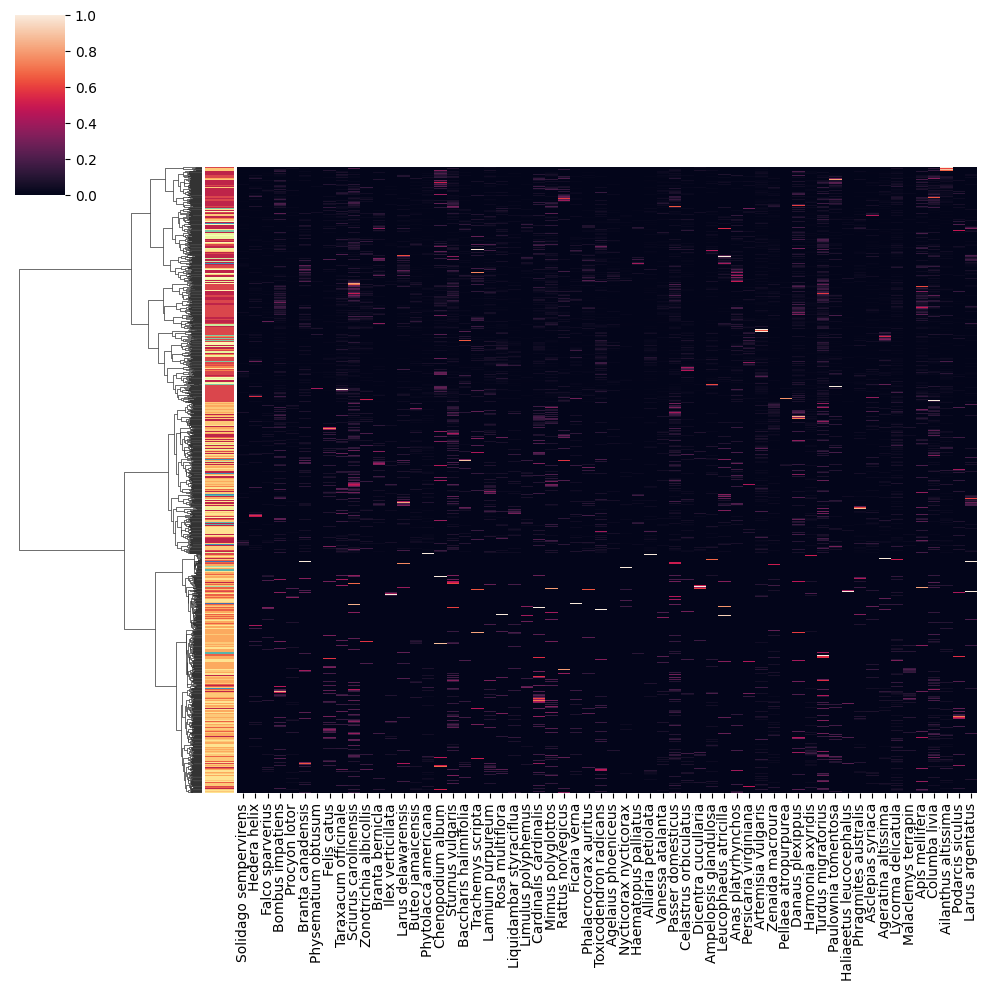

In [42]:
dataframe = pl.DataFrame(data=data)
sns.clustermap(
    data=dataframe,
    col_cluster=False,
    row_cluster=True,
    row_linkage=linkage_array,
    row_colors=col_colors,
    xticklabels=dataframe.columns,
    yticklabels=False,
)